Project Title:

Flood Prediction and Climate Risk Analysis

Problem Statement:
Floods are one of the most frequent and devastating climate disasters, causing human casualties, economic damage, and environmental loss. Predicting flood occurrence (Yes/No) using factors such as rainfall, temperature, humidity, and water level can help improve disaster preparedness, risk management, and climate resilience.

Description:
This project uses a dataset containing environmental variables (rainfall, temperature, humidity, and water level) to explore flood risk patterns. Through exploratory data analysis (EDA), we can identify how these features affect flood occurrence. The insights can guide disaster management authorities in early warning systems, resource allocation, and policy decisions. Later, the dataset can also be extended for AI/ML modeling.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import joblib

In [3]:
df = pd.read_csv('fd.csv/flood.csv')

In [4]:
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [5]:
df.shape

(50000, 21)

In [6]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [7]:
df.head(20)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
5,6,6,6,4,6,4,3,1,3,5,...,10,5,9,5,5,7,3,3,2,0.470
6,6,7,4,5,5,5,4,8,8,4,...,8,4,5,4,7,7,5,4,8,0.570
7,7,3,5,5,6,6,6,7,6,5,...,4,6,9,7,10,6,5,4,5,0.585
8,6,3,5,4,5,11,3,2,9,7,...,2,8,7,5,4,9,6,5,7,0.580
9,4,3,5,6,2,3,7,7,10,4,...,7,6,5,6,7,5,7,4,8,0.555


Exploratory Data Analysis (EDA)
1. Missing Values
2. Target Variable Distribution
3. Feature Coorelation Relation
4. Pairwise Relationships

In [8]:
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

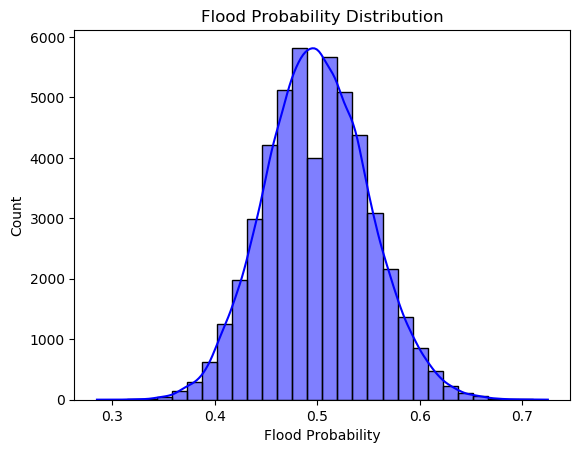

In [9]:
sns.histplot(df["FloodProbability"], kde=True, bins=30, color="blue")
plt.title("Flood Probability Distribution")
plt.xlabel("Flood Probability")
plt.show()

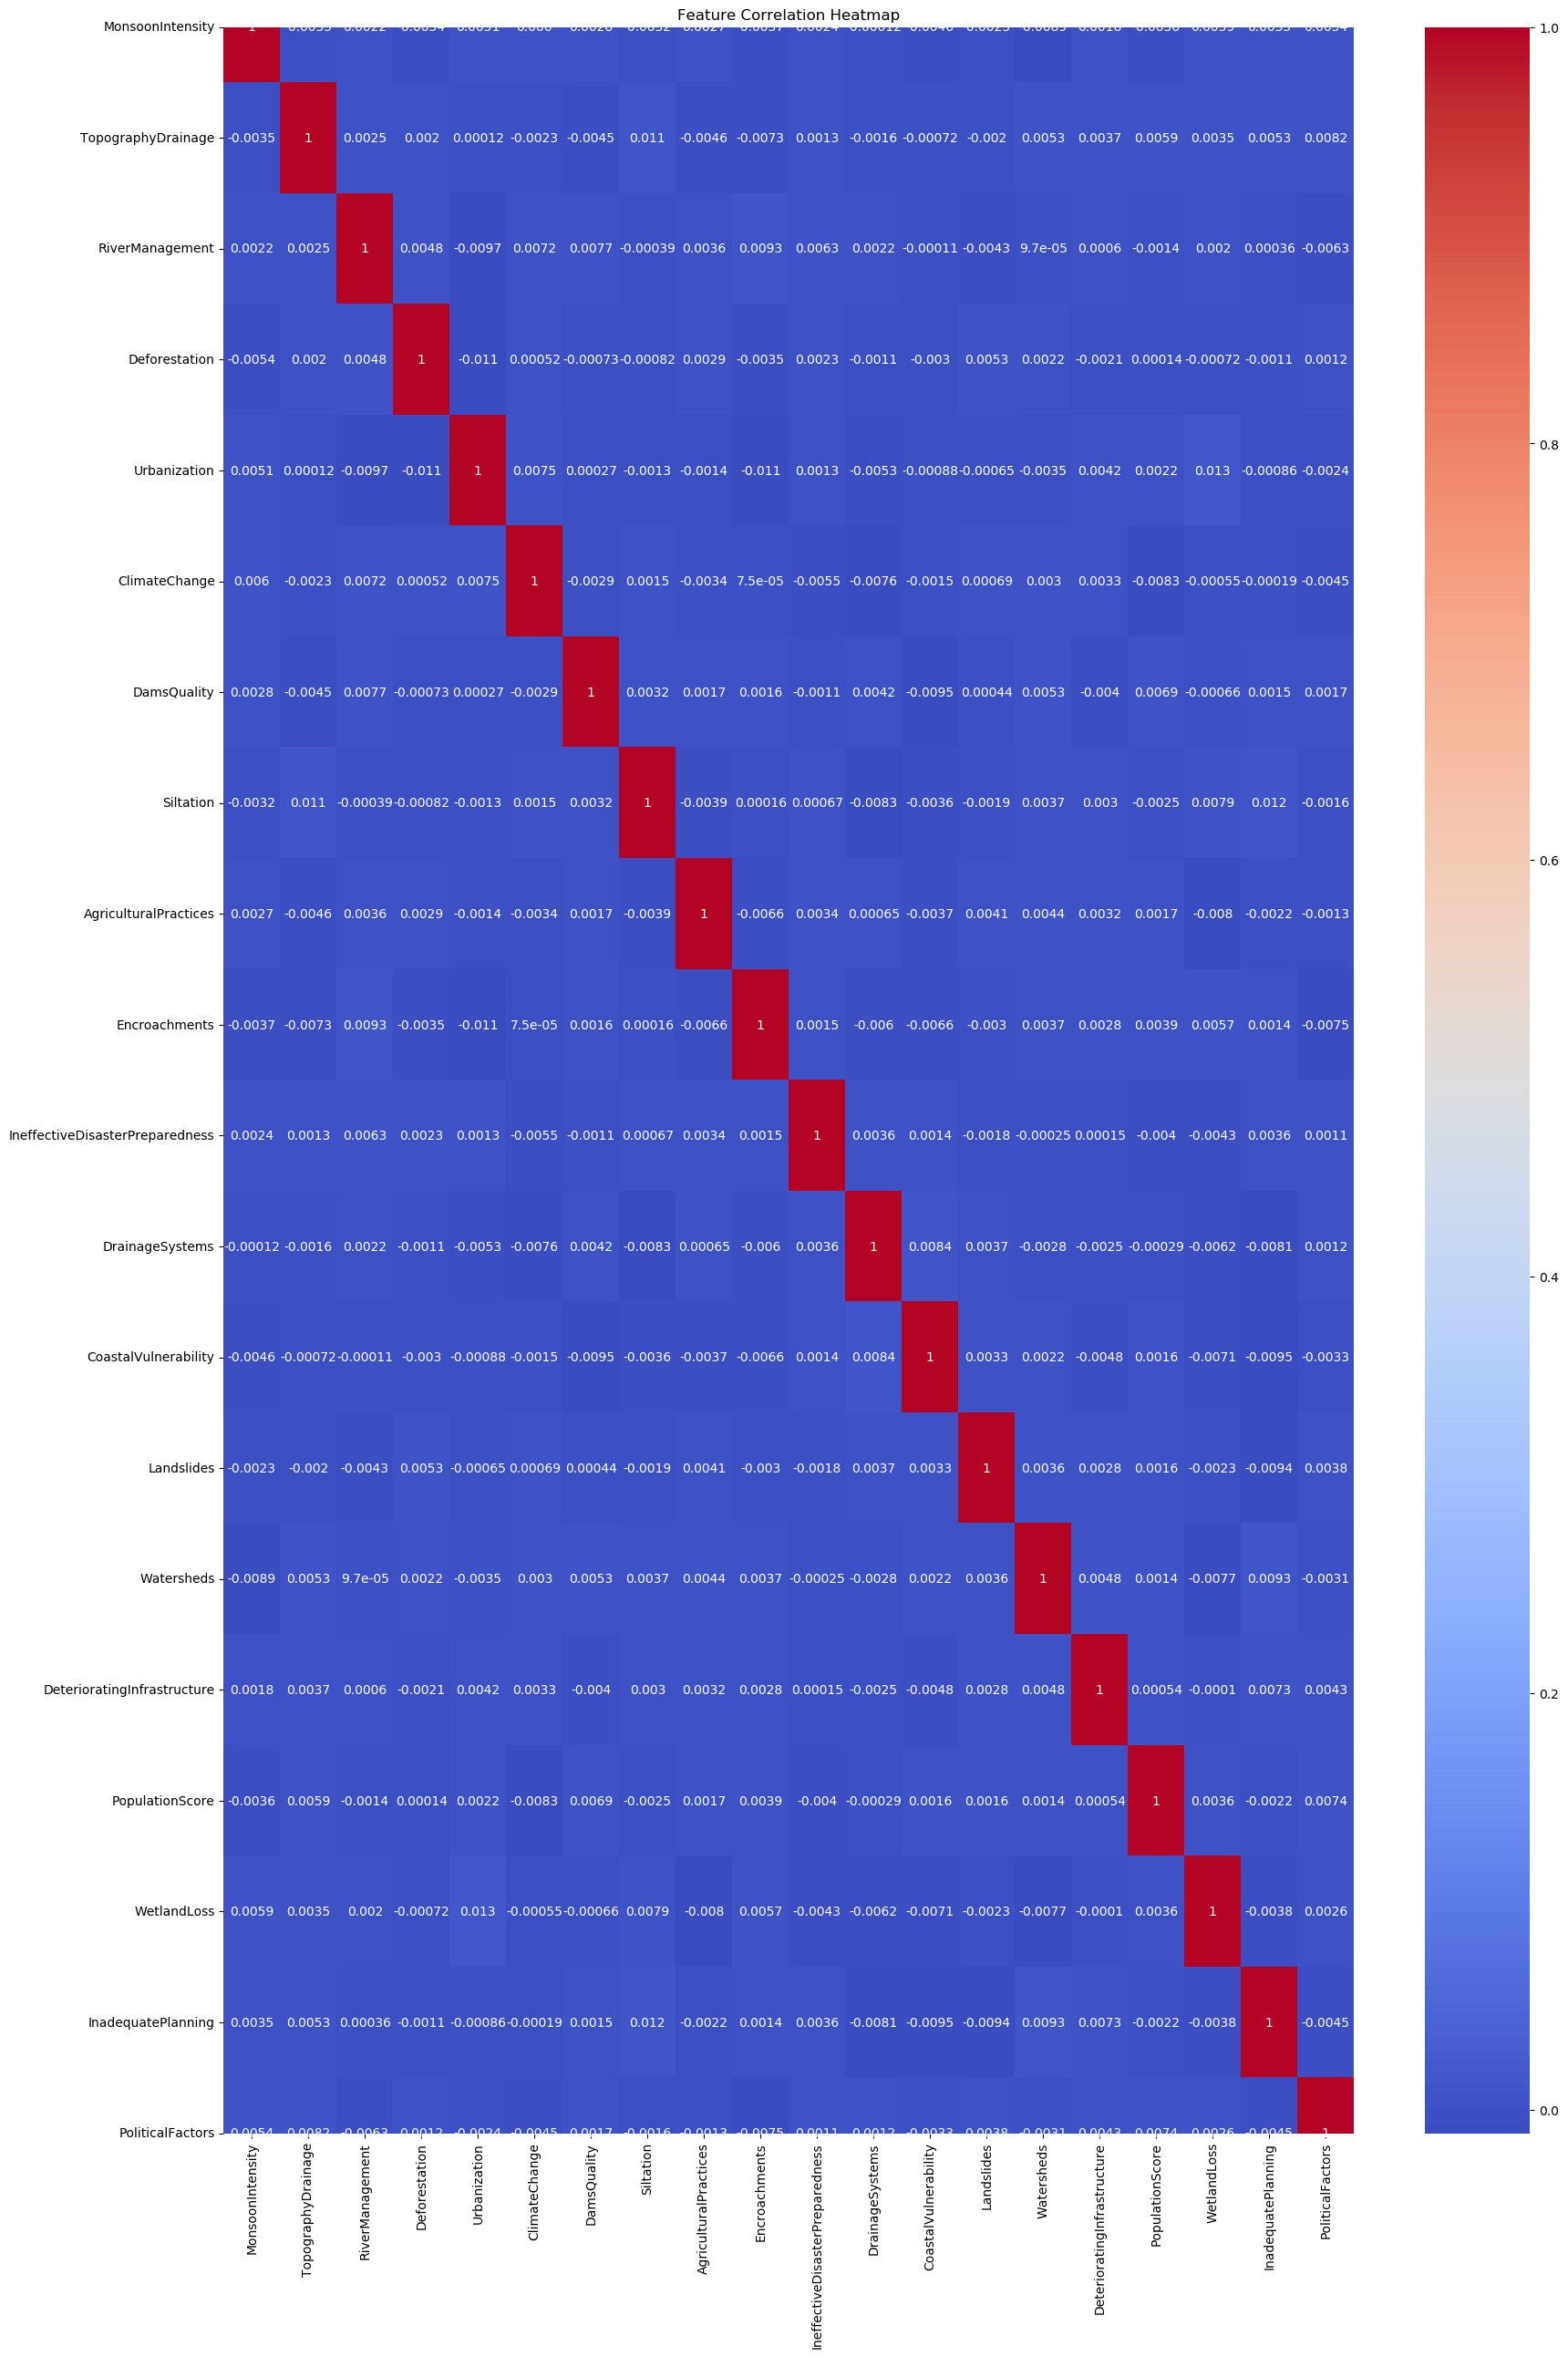

In [10]:
X = df.drop("FloodProbability", axis=1)   # features
y = df["FloodProbability"]                # target

# Correlation heatmap for features
plt.figure(figsize=(20, 30))
sns.heatmap(X.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

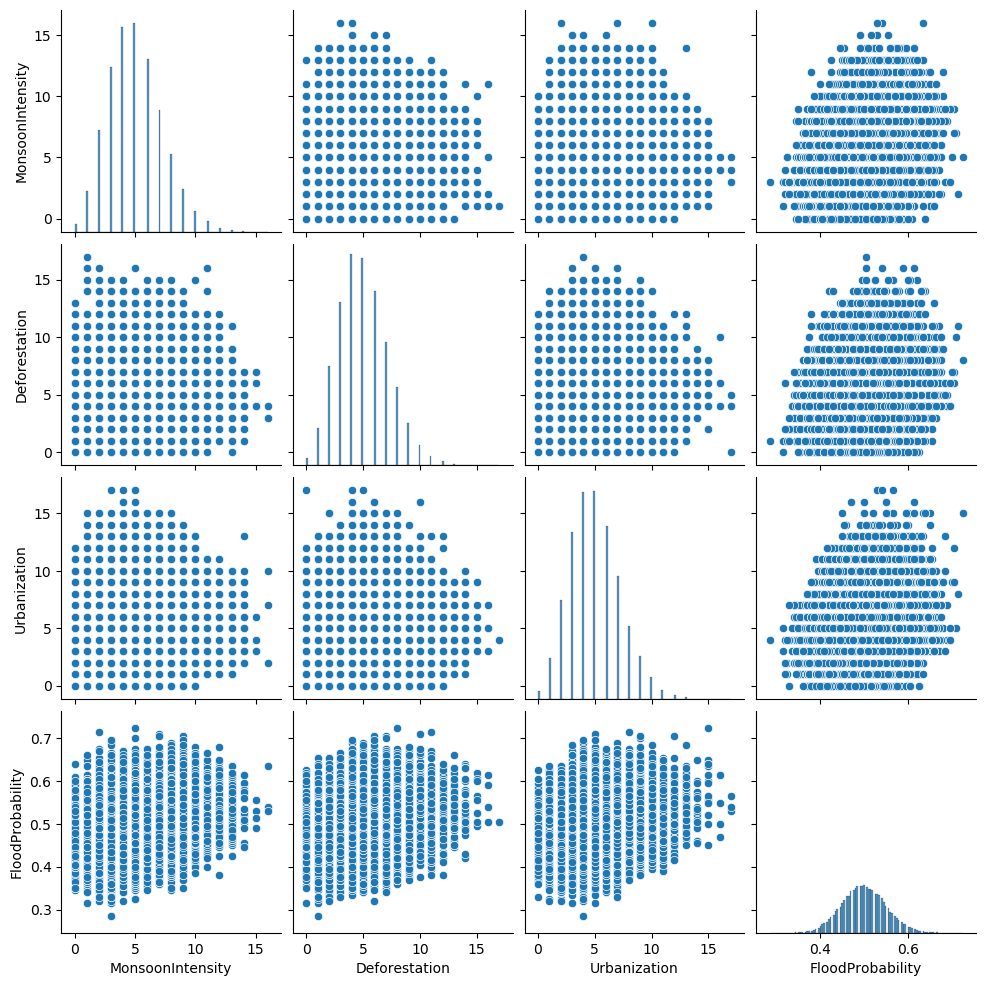

In [12]:
sns.pairplot(df[["MonsoonIntensity","Deforestation","Urbanization","FloodProbability"]])
plt.show()

Feature Engineering
Created new interaction features:

Rainfall × Deforestation
River Management × Dam Quality
Urbanization × Inadequate Planning
Climate Change × Coastal Vulnerability
Climate Change × Wetland Loss

In [13]:
df["Rainfall_Deforestation"] = df["MonsoonIntensity"] * df["Deforestation"]
df["River_Dams"] = df["RiverManagement"] * df["DamsQuality"]
df["Urban_Planning"] = df["Urbanization"] * df["InadequatePlanning"]
df["Climate_Coastal"] = df["ClimateChange"] * df["CoastalVulnerability"]
df["Climate_Wetlands"] = df["ClimateChange"] * df["WetlandLoss"]

df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,Rainfall_Deforestation,River_Dams,Urban_Planning,Climate_Coastal,Climate_Wetlands
0,3,8,6,6,4,4,6,2,3,2,...,4,3,2,6,0.450,18,36,8,28,12
1,8,4,5,7,7,9,1,5,5,4,...,1,9,1,3,0.475,56,5,7,18,81
2,3,10,4,1,7,5,4,7,4,9,...,1,8,3,6,0.515,3,16,21,20,40
3,4,4,2,7,3,4,1,4,6,4,...,8,6,6,10,0.520,28,2,18,8,24
4,3,7,5,2,5,8,5,2,7,5,...,4,4,3,4,0.475,6,25,15,48,32


In [31]:
df['Flood_Occurrence'] = (df['FloodProbability'] > 0.5).astype(int)

Train-Test Split + Scaling

In [14]:
X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest and XGBoost Models

In [17]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [18]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

Model Evaluation

In [19]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Random Forest R2:", r2_score(y_test, rf.predict(X_test_scaled)))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

Random Forest R2: 0.7630664024594073
XGBoost R2: 0.9390442500753418


In [32]:
X_cls = df.drop(["FloodProbability", "Flood_Occurrence"], axis=1)
y_cls = df["Flood_Occurrence"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [33]:
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

Hyperparameter Tuning (Random Forest)

Hyperparameter Tuning – Random Forest

RandomizedSearchCV to find the best parameters.

In [21]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [22]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)

In [23]:
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.6; total time=  15.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.6; total time=  16.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.6; total time=  13.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=  12.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=  12.7s
[CV] END

In [34]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_xgb = random_search.best_estimator_


Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.9843477565023931


In [35]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_cls = RandomForestClassifier(random_state=42)

log_reg.fit(X_train_c_scaled, y_train_c)
rf_cls.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_log = log_reg.predict(X_test_c_scaled)
y_pred_rf_cls = rf_cls.predict(X_test_c_scaled)

Visulaisation

Scatter plot: Random Forest

Scatter plot: XGBoost

Hist Plot: Residuals

Horizontal Bar plot: Feature Importance

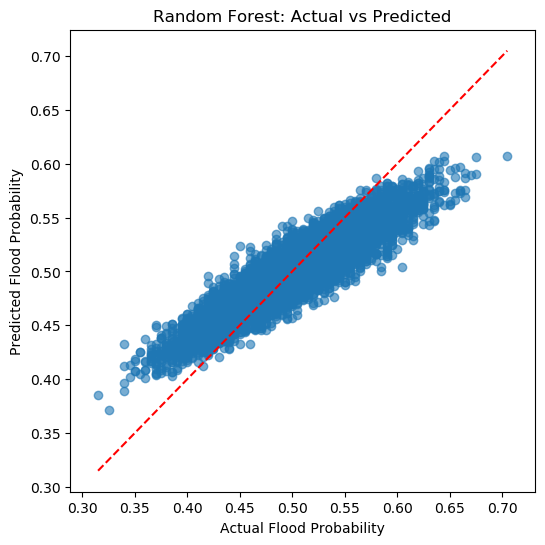

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


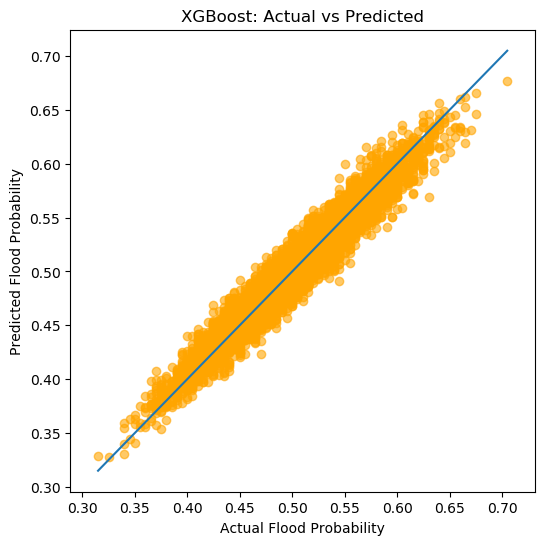

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

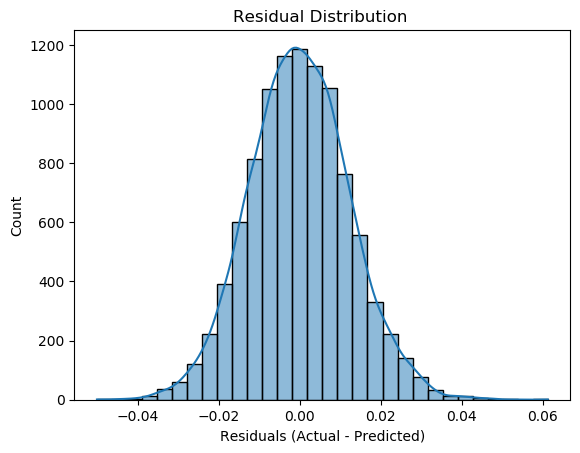

In [ ]:
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution ")
plt.show()

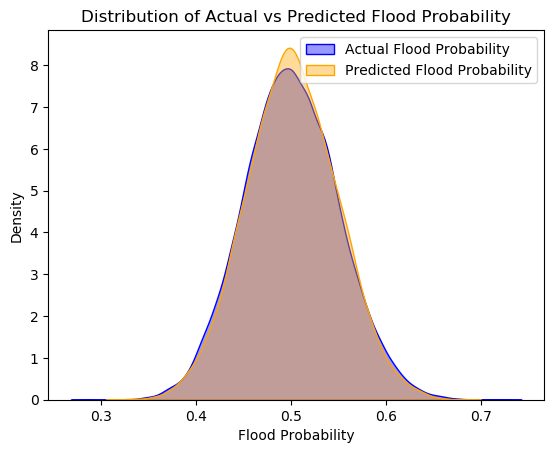

In [ ]:
sns.kdeplot(df['FloodProbability'], label="Actual Flood Probability", fill=True, color="blue", alpha=0.4)
sns.kdeplot(y_pred_xgb, label="Predicted Flood Probability", fill=True, color="orange", alpha=0.4)
plt.title("Distribution of Actual vs Predicted Flood Probability")
plt.xlabel("Flood Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

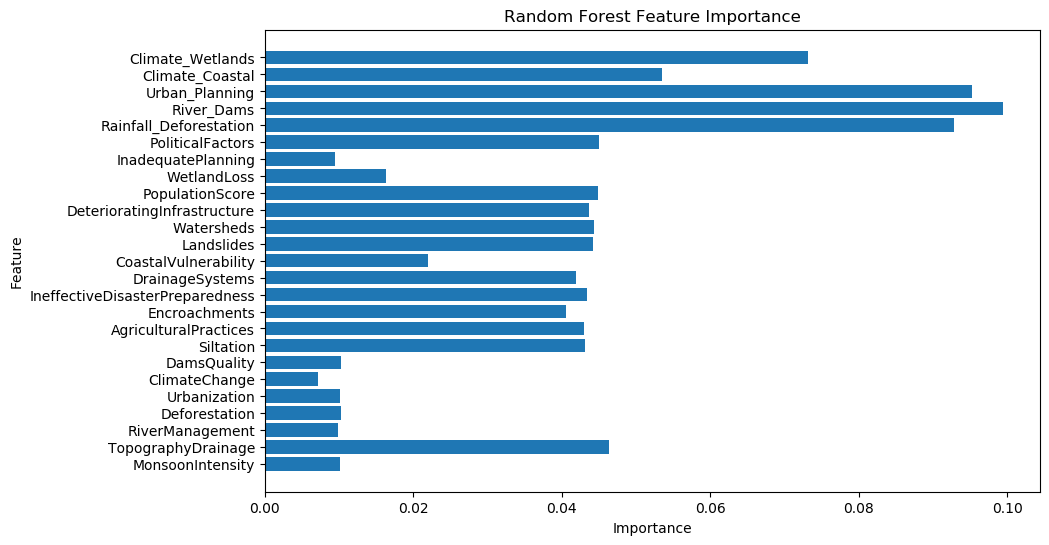

In [ ]:
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

In [38]:
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_c, y_pred_rf_cls))

print("\nClassification Report (Random Forest Classifier):\n", classification_report(y_test_c, y_pred_rf_cls))
print("Confusion Matrix (Random Forest Classifier):\n", confusion_matrix(y_test_c, y_pred_rf_cls))

Logistic Regression Accuracy: 1.0
Random Forest Classifier Accuracy: 0.8736

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      5260
           1       0.89      0.84      0.86      4740

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix (Random Forest Classifier):
 [[4749  511]
 [ 753 3987]]


Cross Validation

In [ ]:

scores = cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean R²:", scores.mean())

Cross-validation scores: [0.98439897 0.98458363 0.98467749 0.9844659  0.98361279]
Mean R²: 0.9843477565023931


In [ ]:

custom_input=pd.DataFrame([[
    7,6,5,4,8,7,5,7,6,8,7,8,1,2,6,7,9,6,8,6]],
    columns= [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
    'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
    'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems',
    'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure',
    'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors'
])

In [ ]:
custom_input["Rainfall_Deforestation"] = custom_input["MonsoonIntensity"] * custom_input["Deforestation"]
custom_input["River_Dams"] = custom_input["RiverManagement"] * custom_input["DamsQuality"]
custom_input["Urban_Planning"] = custom_input["Urbanization"] * custom_input["InadequatePlanning"]
custom_input["Climate_Coastal"] = custom_input["ClimateChange"] * custom_input["CoastalVulnerability"]
custom_input["Climate_Wetlands"] = custom_input["ClimateChange"] * custom_input["WetlandLoss"]

custom_input_scaled=scaler.transform(custom_input)

In [ ]:
custom_pred_rf = rf.predict(custom_input_scaled)
custom_pred_xgb = best_xgb.predict(custom_input_scaled)

In [ ]:
print("Random Forest Prediction (Flood Probability):", custom_pred_rf)
print("XGBoost Prediction (Flood Probability):", custom_pred_xgb)
     

Random Forest Prediction (Flood Probability): [0.5755]
XGBoost Prediction (Flood Probability): [0.6106169]


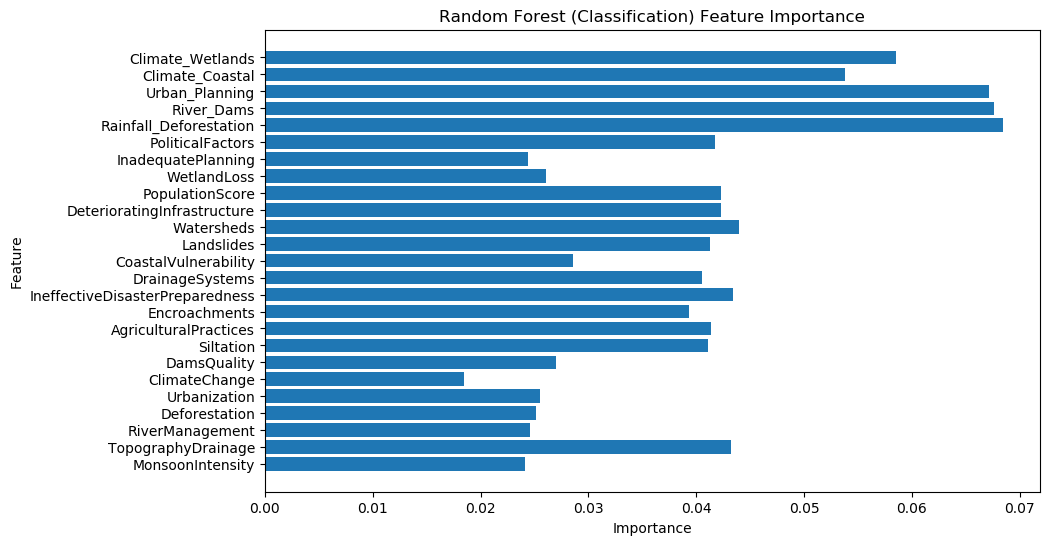

In [39]:
importances_cls = rf_cls.feature_importances_
features_cls = X_cls.columns

plt.figure(figsize=(10,6))
plt.barh(features_cls, importances_cls)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest (Classification) Feature Importance")
plt.show()

In [42]:
joblib.dump(best_xgb, 'xgb_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']